In [1]:
#basic imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import mplleaflet
#import geopandas
from IPython.display import display
import gmplot
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import cufflinks as cf
import plotly.express as px
cf.go_offline()
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from math import sin, cos, sqrt, atan2, radians

## Functions


In [2]:
#Haversine Formula
def distance(lt1,lo1,lt2,lo2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lt1)
    lon1 = radians(lo1)
    lat2 = radians(lt2)
    lon2 = radians(lo2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)

In [3]:
def dep_distance(dis,dep1,dep2):
    a=dep1-dep2
    l=sqrt(a**2+dis**2)
    return(l)


## Data preperation

In [4]:
cluster0=pd.read_csv('df0new.csv')
wellinfo=pd.read_csv('List_Cluster0_3_well_details.csv')
wellcomp=pd.read_csv('List_Cluster0_3_well_completions.csv')
wellcomp

,uwi,formatted uwi,date,top measure (m),bottom measure (m),formation,treatment
0,100010206402W600,100/01-02-064-02W6/00,2017-06-27,4670,5015,NaN,OPEN-HOLE COMPLETION
1,100010206402W600,100/01-02-064-02W6/00,2017-08-18,2821.7,2821.8,NaN,FRACTURED
2,100010206402W600,100/01-02-064-02W6/00,2017-08-18,2879.9,2880,NaN,FRACTURED
3,100010206402W600,100/01-02-064-02W6/00,2017-08-18,2937.3,2937.4,NaN,FRACTURED
4,100010206402W600,100/01-02-064-02W6/00,2017-08-18,2993.4,2993.5,NaN,FRACTURED
...,...,...,...,...,...,...,...
94407,102031706023W500,102/03-17-060-23W5/00,2018-08-24,"3,232","3,272.30",NaN,FRACTURED
94408,100121906023W500,100/12-19-060-23W5/00,2015-02-16,"5,170.50","5,170.60",NaN,FRACTURED
94409,100121906023W500,100/12-19-060-23W5/00,2015-02-17,NaN,NaN,NaN,FRACTURED
94410,100121906023W500,100/12-19-060-23W5/00,2015-02-18,NaN,NaN,NaN,FRACTURED


In [11]:
siesmic

,Unnamed: 0,Unnamed: 0.1,time,lat,lon,max,Mpf,Dep,flag,MwAsg,cutlat,cutlon,cellNo,label
0,2479,2688,2013-12-01 10:06:00,54.449,-117.288,2.97,2.96,0.06,1,3.0,53,48,5348,13.0
1,2480,2689,2013-12-01 15:09:00,54.450,-117.400,3.85,3.04,0.02,1,3.0,53,48,5348,13.0
2,2481,2690,2013-12-01 19:12:00,54.436,-117.330,2.84,2.62,0.03,1,2.6,53,48,5348,13.0
3,2482,2691,2013-12-01 20:26:00,54.450,-117.306,2.71,2.52,0.03,1,2.5,53,48,5348,13.0
4,2484,2693,2013-12-01 20:49:00,54.449,-117.323,3.05,2.75,0.02,1,2.8,53,48,5348,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,6685,5259,2017-07-01 21:37:00,54.404,-117.428,2.00,2.00,17.40,2,1.9,52,47,5247,0.0
844,6693,5353,2017-07-25 22:57:00,54.459,-117.358,2.00,2.00,20.40,1,2.0,53,48,5348,0.0
845,6716,5903,2018-04-19 08:40:00,54.295,-117.490,2.81,2.81,16.37,1,2.8,52,47,5247,0.0
846,6731,6064,2018-07-05 15:12:00,54.308,-117.713,3.00,3.00,13.11,1,3.0,52,45,5245,0.0


In [5]:
wellcomp.describe()

,uwi,formatted uwi,date,top measure (m),bottom measure (m),formation,treatment
count,94412,94412,94412,94115,94115,1865,94412
unique,733,733,1816,22552,26818,17,16
top,100010406224W500,100/01-04-062-24W5/00,2017-07-16,4313,0,MONTNEY FM,JET PERFORATION
freq,686,686,304,48,163,696,70678


In [6]:
approved=pd.read_csv("HF vs IS.csv")
#approved=approved[['Year', 'Month', 'Day','Hour','Minute','Second','Lat', 'Lon', 'Mw', 'seismic_no', 'seismic_Dep', 'well_name',
#       'well_uwi', 'well_date', 'well_lat', 'well_lon', 'well_Dep']]
approved['time']=pd.to_datetime(approved[['Year', 'Month', 'Day']])
approved.drop(['Year', 'Month', 'Day','Hour','Minute','Second'], axis=1,inplace=True)
approved=approved[['seismic_no','Lat', 'Lon', 'Mw','time','seismic_Dep', 'well_name',
       'well_uwi', 'well_date', 'well_lat', 'well_lon', 'well_Dep']]
approved['well_date'] = approved['well_date'].astype('datetime64[ns]')
approved['dt']=approved['time']-approved['well_date']
approved['dt'] = approved['dt'].astype('timedelta64[D]').astype(int)
approved['dDep']=abs(approved['well_Dep']-approved['seismic_Dep'])
approved['Lateraldist']=0.000

In [7]:
for i in range(0,len(approved)):
    approved['Lateraldist'][i]=distance(approved['Lat'][i],approved['Lon'][i],approved['well_lat'][i],approved['well_lon'][i])

In [8]:
approved

,seismic_no,Lat,Lon,Mw,time,seismic_Dep,well_name,well_uwi,well_date,well_lat,well_lon,well_Dep,dt,dDep,Lateraldist
0,3446,54.369,-117.353,3.61,2015-01-14,6.56,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-14,54.355520,-117.338848,3.63564,0,2.92436,1.757654
1,3446,54.369,-117.353,3.61,2015-01-14,6.56,MURPHY 03-14E GRIZZLY 14-11-62-23,100151506223W502,2015-01-14,54.367202,-117.362746,3.58732,0,2.97268,0.662448
2,3460,54.501,-117.376,2.90,2015-01-16,2.19,ECA HZ WAHIGAN 15-34-63-23,100153406323W500,2015-01-16,54.501007,-117.385964,3.35602,0,1.16602,0.643574
3,3460,54.501,-117.376,2.90,2015-01-16,2.19,ECA 102 HZ WAHIGAN 1-3-64-23,102010306423W500,2015-01-16,54.501712,-117.384046,3.34874,0,1.15874,0.525686
4,3460,54.501,-117.376,2.90,2015-01-16,2.19,ECA 103 HZ WAHIGAN 1-3-64-23,103010306423W500,2015-01-16,54.502471,-117.382102,3.34454,0,1.15454,0.426734
5,3460,54.501,-117.376,2.90,2015-01-16,2.19,ECA 104 HZ WAHIGAN 1-3-64-23,104010306423W500,2015-01-16,54.503525,-117.380277,3.34327,0,1.15327,0.393941
6,3479,54.427,-117.305,3.60,2015-01-23,2.13,TALISMAN 02 HZ WAHIGAN 15-7-63-22,102150706322W500,2015-01-08,54.441930,-117.310087,3.38722,15,1.25722,1.692958
7,3479,54.427,-117.305,3.60,2015-01-23,2.13,TALISMAN HZ WAHIGAN 15-7-63-22,100150706322W502,2015-01-09,54.441908,-117.313193,3.38842,14,1.25842,1.740869
8,3506,54.445,-117.564,2.90,2015-02-08,3.50,ECA HZ WAHIGAN 12-2-63-24,100120206324W500,2015-02-08,54.424561,-117.529111,3.53523,0,0.03523,3.203606
9,3518,54.368,-117.223,3.00,2015-02-10,3.50,XTO 102 GRIZZLY 1-16-62-22,102011606222W500,2015-02-10,54.357389,-117.229285,3.38136,0,0.11864,1.248568


In [9]:
cluster0.reset_index(inplace=True,drop=True)
cluster0['time']=pd.to_datetime(cluster0['time'])

In [10]:
wellinfo=wellinfo[['well name', 'wellbore_uwi', 'formatted_uwi', 'bottom_latitude', 'bottom_longitude',
       'last_spud_date', 'fin_drl_date', 'tv_depth (m)', 'well_total_depth (m)','field_name', 'formation',
       'surface_latitude', 'surface_longitude', 'projected_formation']]
wellinfo.rename(columns={"formation":"wellformation","wellbore_uwi":"uwi"},inplace=True)


In [11]:
wellcomp=wellcomp[wellcomp['treatment']=='FRACTURED']

In [12]:
well=pd.merge(wellinfo, wellcomp, how='right', on=['uwi'])
well.drop(['formatted_uwi', 'formatted uwi'], axis=1,inplace=True)
well['date']=pd.to_datetime(well['date'])
well['TVD']=well['tv_depth (m)']/1000

In [13]:
well

,well name,uwi,bottom_latitude,bottom_longitude,last_spud_date,fin_drl_date,tv_depth (m),well_total_depth (m),field_name,wellformation,surface_latitude,surface_longitude,projected_formation,date,top measure (m),bottom measure (m),formation,treatment,TVD
0,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,54.373288,-117.586686,2017-04-12,2017-05-08,3803.77,6875.0,WASKAHIGAN,Duvernay,54.353132,-117.555499,DUVERNAY FM,2017-06-25,6779,6829.3,NaN,FRACTURED,3.80377
1,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,54.373288,-117.586686,2017-04-12,2017-05-08,3803.77,6875.0,WASKAHIGAN,Duvernay,54.353132,-117.555499,DUVERNAY FM,2017-06-26,6744,6774.5,NaN,FRACTURED,3.80377
2,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,54.373288,-117.586686,2017-04-12,2017-05-08,3803.77,6875.0,WASKAHIGAN,Duvernay,54.353132,-117.555499,DUVERNAY FM,2017-06-27,6709,6739.5,NaN,FRACTURED,3.80377
3,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,54.373288,-117.586686,2017-04-12,2017-05-08,3803.77,6875.0,WASKAHIGAN,Duvernay,54.353132,-117.555499,DUVERNAY FM,2017-06-28,6639,6669.5,NaN,FRACTURED,3.80377
4,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,54.373288,-117.586686,2017-04-12,2017-05-08,3803.77,6875.0,WASKAHIGAN,Duvernay,54.353132,-117.555499,DUVERNAY FM,2017-06-28,6674,6704.5,NaN,FRACTURED,3.80377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22978,ECA HZ TONY CKN 12-30-63-21,100123006321W500,54.480899,-117.173959,2016-08-23,2016-09-18,3234.50,6612.0,TONY CREEK NORTH,Duvernay,54.454441,-117.154150,DUVERNAY FM,2016-10-31,3868,3921,NaN,FRACTURED,3.23450
22979,ECA HZ TONY CKN 12-30-63-21,100123006321W500,54.480899,-117.173959,2016-08-23,2016-09-18,3234.50,6612.0,TONY CREEK NORTH,Duvernay,54.454441,-117.154150,DUVERNAY FM,2016-11-01,3729,3782,NaN,FRACTURED,3.23450
22980,ECA HZ TONY CKN 12-30-63-21,100123006321W500,54.480899,-117.173959,2016-08-23,2016-09-18,3234.50,6612.0,TONY CREEK NORTH,Duvernay,54.454441,-117.154150,DUVERNAY FM,2016-11-02,3659,3712,NaN,FRACTURED,3.23450
22981,ECA HZ TONY CKN 12-30-63-21,100123006321W500,54.480899,-117.173959,2016-08-23,2016-09-18,3234.50,6612.0,TONY CREEK NORTH,Duvernay,54.454441,-117.154150,DUVERNAY FM,2016-11-03,3590,3643,NaN,FRACTURED,3.23450


In [26]:
well.describe()

,bottom_latitude,bottom_longitude,tv_depth (m),well_total_depth (m),surface_latitude,surface_longitude,TVD
count,22983.000000,22983.000000,22983.000000,22983.000000,22983.000000,22983.000000,22983.000000
mean,54.357639,-117.309822,3038.126928,5632.707362,54.354482,-117.309479,3.038127
std,0.121178,0.341989,554.555246,986.821367,0.124064,0.340299,0.554555
min,54.138385,-118.307301,1494.060000,2000.000000,54.122169,-118.307301,1.494060
25%,54.239911,-117.528521,2767.460000,5250.000000,54.240494,-117.555499,2.767460
50%,54.356286,-117.309959,3161.120000,5802.000000,54.353401,-117.304591,3.161120
75%,54.457403,-117.009274,3342.390000,6250.000000,54.456283,-117.007777,3.342390
max,54.641889,-116.679065,4079.000000,7515.000000,54.649935,-116.673674,4.079000


## Comparing wellinfo and wellcomp

In [22]:
a=list(wellinfo['uwi'].unique())


In [23]:
b=list(wellcomp['uwi'].unique())


In [24]:
#len(set(a).intersection(b))
list_difference = []
for item in a:
  if item not in b:
    list_difference.append(item)

print(list_difference)
len(list_difference)

['100043306422W500', '102142506021W500', '102102006522W500', '100012506321W500', '100130406320W500', '102122106320W500', '100132106424W502', '100132806223W500', '100052906320W500', '100123506020W500', '100090706220W500', '100132806024W500', '100010806401W600', '100070706220W500', '100103606024W503', '102120206120W502', '100092206020W500', '102140806220W500', '100112006424W500', '104120806220W500', '100112906320W502', '103122906320W503', '104080706220W500', '102143306220W500', '103102606220W500', '100090306120W500', '100133306220W500', '100113506020W500', '102130806220W500', '100052106320W500', '100050606226W500', '103040906320W500', '100052506202W600', '100120206120W500', '100072506425W500', '100012806123W500', '102050306320W500', '102133306220W500', '100132306423W500']


39

In [25]:
wellcomp['uwi'].nunique()

733

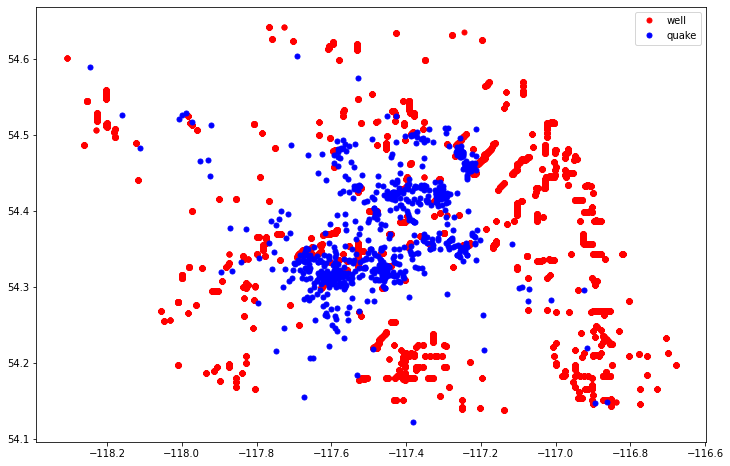

In [41]:
plot_locs_fig,plot_locs_ax=plt.subplots(figsize=(12,8))
plot_locs_ax.plot(well['bottom_longitude'],well['bottom_latitude'],'ro',markersize=5,label="well")
plot_locs_ax.plot(cluster0['lon'],cluster0['lat'],'bo',markersize=5,label="quake")
plot_locs_ax.legend()

## result for loop

In [17]:
result = pd.DataFrame(columns=["seismic_no",'seismic_time',"seismic_lat","seismic_lon","seismic_Dep","Mpf","well_name","well_uwi"
                         ,"well_date","well_lat","well_lon","well_Dep","dist","dt"])
for j in range(0,len(well)):
    for i in range(0,len(cluster0)):
        d1=distance(well['bottom_latitude'][j],well['bottom_longitude'][j],cluster0['lat'][i],cluster0['lon'][i])
        dist=dep_distance(d1,well['TVD'][j],cluster0['Dep'][i])
        dt=((well['date'][j]-cluster0['time'][i]).total_seconds()/timedelta(days=1).total_seconds())
        if dist<=5 and dt<=30 and dt>0:
                    result = result.append({'seismic_no':cluster0['Unnamed: 0'][i],
                                'seismic_time':cluster0['time'][i],
                                "seismic_lat":cluster0['lat'][i],
                                "seismic_lon":cluster0['lon'][i],
                                "seismic_Dep":cluster0['Dep'][i],
                                "Mpf":cluster0['Mpf'][i],
                                'well_name':well['well name'][j],
                               'well_uwi':well['uwi'][j],
                                'well_date':well['date'][j],
                                'well_lat':well['bottom_latitude'][j],
                                'well_lon':well['bottom_longitude'][j],
                                'well_Dep':well['TVD'][j],
                                            "dt":dt,"dist":dist
                                            
                               },
                               ignore_index=True)
                
            

        
        


## working on result

In [19]:
result['dDep']=abs(result['well_Dep']-result['seismic_Dep'])
result['Lateraldist']=0.000

In [20]:
for i in range(0,len(result)):
    result['Lateraldist'][i]=distance(result['seismic_lat'][i],result['seismic_lon'][i],result['well_lat'][i],result['well_lon'][i])

In [21]:
result

,seismic_no,seismic_time,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_name,well_uwi,well_date,well_lat,well_lon,well_Dep,dist,dt,dDep,Lateraldist
0,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-25,54.373288,-117.586686,3.80377,4.794941,0.419444,0.29377,4.785933
1,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-26,54.373288,-117.586686,3.80377,4.794941,1.419444,0.29377,4.785933
2,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-27,54.373288,-117.586686,3.80377,4.794941,2.419444,0.29377,4.785933
3,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28,54.373288,-117.586686,3.80377,4.794941,3.419444,0.29377,4.785933
4,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28,54.373288,-117.586686,3.80377,4.794941,3.419444,0.29377,4.785933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28364,5371,2015-01-13 20:58:00,54.351,-117.328,2.80,2.52,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19,54.355520,-117.338848,3.63564,1.202312,5.126389,0.83564,0.864442
28365,5372,2015-01-14 00:48:00,54.362,-117.355,2.80,2.49,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19,54.355520,-117.338848,3.63564,1.521108,4.966667,0.83564,1.271013
28366,5373,2015-01-14 03:40:00,54.365,-117.344,2.80,2.35,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19,54.355520,-117.338848,3.63564,1.386245,4.847222,0.83564,1.106065
28367,5374,2015-01-14 07:51:00,54.349,-117.337,3.49,2.27,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19,54.355520,-117.338848,3.63564,0.749336,4.672917,0.14564,0.735046


In [22]:
result.to_csv('cluster0new_result.csv')

## Applying Kernel (StandardScaler) + Mpf

In [14]:
approved_rename=approved.rename(columns={"Mw":"Mpf"})
#approved_rename

In [15]:
approved_feature3=approved_rename[['dt','dDep','Lateraldist','Mpf']]
result3=pd.read_csv('cluster0new_result.csv')
result3_feature=result3[['dt','dDep','Lateraldist','Mpf']]
to_norm3= pd.concat([approved_feature3,result3_feature], axis=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(to_norm3)
to_norm3_scaled = scaler.transform(to_norm3)
to_norm3_scaled
app_feature3_scaled=to_norm3_scaled[0:16]
result3_feature_scaled=to_norm3_scaled[16:]
result3_feature_scaled
#app_feature3_scaled

array([[-1.213073  , -0.7789153 ,  1.93755029, -1.07340665],
       [-1.07223466, -0.7789153 ,  1.93755029, -1.07340665],
       [-0.93139632, -0.7789153 ,  1.93755029, -1.07340665],
       ...,
       [-0.58947214, -0.34517163, -0.91824344,  0.28136144],
       [-0.61402105, -0.897487  , -1.20617615,  0.05076261],
       [-0.66243422,  1.32675905, -0.41257223,  3.9132929 ]])

In [16]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, cdist, squareform
d3=cdist(app_feature3_scaled,result3_feature_scaled,'sqeuclidean')
sigma2=1
k3=np.exp((-d3.T)/(2*(sigma2)))
k3

array([[2.73704675e-08, 2.38356501e-09, 5.91830298e-05, ...,
        1.48791080e-07, 8.50600773e-08, 5.20449441e-08],
       [2.68758207e-08, 2.34048855e-09, 5.81134573e-05, ...,
        1.46102086e-07, 8.35228474e-08, 5.11043731e-08],
       [2.58718112e-08, 2.25305409e-09, 5.59424924e-05, ...,
        1.40644099e-07, 8.04026549e-08, 4.91952490e-08],
       ...,
       [2.35449700e-04, 2.36198356e-04, 2.04109916e-01, ...,
        2.81368686e-03, 2.65689024e-03, 2.47568467e-03],
       [2.85265950e-05, 3.57795216e-05, 1.10636292e-01, ...,
        1.49580721e-03, 1.48316544e-03, 1.43810004e-03],
       [8.30377597e-01, 5.78205813e-01, 2.61386258e-02, ...,
        5.86375597e-02, 5.09221601e-02, 4.43840742e-02]])

In [17]:
f3=pd.DataFrame(data=k3,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16'])
f3

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,2.737047e-08,2.383565e-09,0.000059,0.000044,0.000034,0.000031,2.325226e-08,3.356597e-08,0.006101,0.000125,0.000037,4.280437e-11,2.405131e-08,1.487911e-07,8.506008e-08,5.204494e-08
1,2.687582e-08,2.340489e-09,0.000058,0.000043,0.000034,0.000031,3.074404e-08,4.350915e-08,0.005991,0.000122,0.000053,4.203080e-11,2.823241e-08,1.461021e-07,8.352285e-08,5.110437e-08
2,2.587181e-08,2.253054e-09,0.000056,0.000042,0.000032,0.000030,3.985129e-08,5.529012e-08,0.005767,0.000118,0.000075,4.046064e-11,3.248949e-08,1.406441e-07,8.040265e-08,4.919525e-08
3,2.441617e-08,2.126289e-09,0.000053,0.000039,0.000030,0.000028,5.064183e-08,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08
4,2.441617e-08,2.126289e-09,0.000053,0.000039,0.000030,0.000028,5.064183e-08,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28364,1.076154e-03,1.266105e-03,0.402450,0.395135,0.386432,0.383081,2.296991e-03,2.698260e-03,0.066306,0.240045,0.122159,6.423742e-06,1.319676e-02,1.267970e-02,1.237318e-02,1.185067e-02
28365,9.830323e-04,8.844942e-04,0.334033,0.318630,0.304152,0.299103,1.974315e-03,2.354028e-03,0.103008,0.225362,0.113760,5.809013e-06,8.543430e-03,9.386522e-03,8.666781e-03,7.925537e-03
28366,2.354497e-04,2.361984e-04,0.204110,0.196991,0.189898,0.187355,4.646817e-04,5.527296e-04,0.048808,0.115435,0.079698,7.518837e-07,2.616637e-03,2.813687e-03,2.656890e-03,2.475685e-03
28367,2.852660e-05,3.577952e-05,0.110636,0.109981,0.108593,0.107987,1.140897e-04,1.346558e-04,0.024615,0.081263,0.054996,7.519013e-08,1.477610e-03,1.495807e-03,1.483165e-03,1.438100e-03


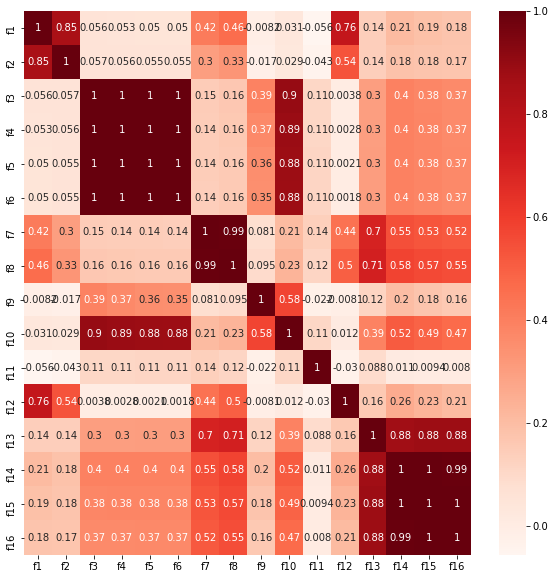

In [18]:
cor3 = f3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor3, annot=True, cmap=plt.cm.Reds)

In [19]:
result3_final= pd.concat([result3, f3], axis=1)
result3_final.describe()

,Unnamed: 0,seismic_no,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_lat,well_lon,well_Dep,dist,...,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,28369.00000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,28369.000000,...,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04,2.836900e+04
mean,14184.00000,5637.857485,54.363670,-117.507900,4.051760,2.251801,54.364451,-117.506193,3.692122,2.882821,...,4.176963e-03,4.591512e-03,4.661380e-02,4.773113e-02,6.420296e-02,6.815073e-04,7.159279e-03,7.388351e-03,6.911334e-03,6.424506e-03
std,8189.56923,501.196520,0.065605,0.162136,1.776802,0.346018,0.065408,0.164946,0.301943,1.326552,...,1.881206e-02,2.084423e-02,1.001046e-01,1.241404e-01,1.256428e-01,1.076139e-02,4.640262e-02,4.637788e-02,4.555667e-02,4.408476e-02
min,0.00000,2494.000000,54.137000,-118.035000,0.000000,1.000000,54.150612,-118.055779,1.646520,0.221274,...,6.855936e-15,9.735634e-15,6.241100e-09,1.334780e-09,8.393783e-09,1.877229e-19,1.656440e-14,5.619803e-14,3.357024e-14,2.131434e-14
25%,7092.00000,5479.000000,54.314000,-117.613000,3.270000,2.030000,54.312321,-117.607224,3.508540,1.652593,...,4.612829e-06,5.267581e-06,9.708045e-04,4.147162e-04,3.131084e-03,1.226652e-09,3.502997e-06,2.276530e-06,1.717216e-06,1.281414e-06
50%,14184.00000,5727.000000,54.341000,-117.562000,3.500000,2.190000,54.344756,-117.586686,3.767570,3.116926,...,4.183548e-05,4.654056e-05,7.947367e-03,4.617622e-03,1.499607e-02,2.519052e-08,7.504735e-05,5.395390e-05,4.509595e-05,3.810362e-05
75%,21276.00000,5974.000000,54.414000,-117.425000,5.000000,2.460000,54.398961,-117.408177,3.931480,4.004434,...,6.205153e-04,7.040765e-04,3.951789e-02,2.929276e-02,6.256664e-02,8.665999e-07,8.488381e-04,6.874188e-04,5.901624e-04,4.998748e-04
max,28368.00000,6247.000000,54.538000,-116.833000,7.810000,3.610000,54.532513,-116.851684,3.974470,4.999689,...,3.920359e-01,4.698555e-01,9.937762e-01,9.949943e-01,8.988774e-01,3.157095e-01,9.998021e-01,9.878910e-01,9.998836e-01,9.998836e-01


In [20]:
kmeans = KMeans(n_clusters=2,random_state=101)
kmeans.fit(f3)
#kmeans.cluster_centers_
result3_final['label']=kmeans.labels_
#f3['label']=kmeans.labels_
result3_final

,Unnamed: 0,seismic_no,seismic_time,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_name,well_uwi,well_date,...,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
0,0,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-25 00:00:00,...,3.356597e-08,0.006101,0.000125,0.000037,4.280437e-11,2.405131e-08,1.487911e-07,8.506008e-08,5.204494e-08,0
1,1,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-26 00:00:00,...,4.350915e-08,0.005991,0.000122,0.000053,4.203080e-11,2.823241e-08,1.461021e-07,8.352285e-08,5.110437e-08,0
2,2,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-27 00:00:00,...,5.529012e-08,0.005767,0.000118,0.000075,4.046064e-11,3.248949e-08,1.406441e-07,8.040265e-08,4.919525e-08,0
3,3,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28 00:00:00,...,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08,0
4,4,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28 00:00:00,...,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28364,28364,5371,2015-01-13 20:58:00,54.351,-117.328,2.80,2.52,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,2.698260e-03,0.066306,0.240045,0.122159,6.423742e-06,1.319676e-02,1.267970e-02,1.237318e-02,1.185067e-02,1
28365,28365,5372,2015-01-14 00:48:00,54.362,-117.355,2.80,2.49,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,2.354028e-03,0.103008,0.225362,0.113760,5.809013e-06,8.543430e-03,9.386522e-03,8.666781e-03,7.925537e-03,1
28366,28366,5373,2015-01-14 03:40:00,54.365,-117.344,2.80,2.35,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,5.527296e-04,0.048808,0.115435,0.079698,7.518837e-07,2.616637e-03,2.813687e-03,2.656890e-03,2.475685e-03,0
28367,28367,5374,2015-01-14 07:51:00,54.349,-117.337,3.49,2.27,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,1.346558e-04,0.024615,0.081263,0.054996,7.519013e-08,1.477610e-03,1.495807e-03,1.483165e-03,1.438100e-03,0


In [81]:
result3_final[result3_final['label']==1].describe()

,Unnamed: 0,seismic_no,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_lat,well_lon,well_Dep,dist,...,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,...,1810.000000,1810.000000,1810.000000,1810.000000,1.810000e+03,1810.000000,1810.000000,1810.000000,1810.000000,1810.0
mean,15380.398895,5696.703867,54.374438,-117.447120,3.425387,2.728773,54.374736,-117.445339,3.643176,1.383256,...,0.020939,0.203975,0.456553,0.101441,7.203009e-04,0.073384,0.090765,0.085920,0.080484,1.0
std,8239.248959,225.072775,0.066365,0.165402,0.630201,0.207756,0.069041,0.169785,0.258393,0.509629,...,0.035804,0.173276,0.205521,0.094196,3.093637e-03,0.128439,0.147668,0.147502,0.144411,0.0
min,521.000000,5371.000000,54.286000,-117.685000,1.970000,2.370000,54.297776,-117.692841,3.299100,0.221274,...,0.000187,0.011330,0.060367,0.001651,5.992908e-07,0.001833,0.003735,0.003637,0.003478,1.0
25%,7034.250000,5490.000000,54.314000,-117.606000,3.190000,2.590000,54.307604,-117.607224,3.445280,1.035387,...,0.002633,0.075581,0.291463,0.036142,1.116083e-05,0.013058,0.018029,0.017253,0.016025,1.0
50%,16985.000000,5736.000000,54.352000,-117.474000,3.500000,2.720000,54.354970,-117.465475,3.567550,1.375492,...,0.009003,0.149130,0.417347,0.067659,6.614982e-05,0.039513,0.046983,0.042532,0.038368,1.0
75%,22922.750000,5776.000000,54.453000,-117.255000,3.500000,2.800000,54.448295,-117.246651,3.932430,1.695157,...,0.023763,0.290602,0.623808,0.132023,1.856168e-04,0.076046,0.100228,0.091230,0.083508,1.0
max,28365.000000,6224.000000,54.501000,-117.213000,6.530000,3.500000,54.503525,-117.214284,3.958950,3.149674,...,0.281263,0.979944,0.994994,0.474937,2.705463e-02,0.920341,0.987891,0.999884,0.999884,1.0


In [82]:
result3_final

,Unnamed: 0,seismic_no,seismic_time,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_name,well_uwi,well_date,...,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
0,0,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-25 00:00:00,...,3.356597e-08,0.006101,0.000125,0.000037,4.280437e-11,2.405131e-08,1.487911e-07,8.506008e-08,5.204494e-08,0
1,1,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-26 00:00:00,...,4.350915e-08,0.005991,0.000122,0.000053,4.203080e-11,2.823241e-08,1.461021e-07,8.352285e-08,5.110437e-08,0
2,2,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-27 00:00:00,...,5.529012e-08,0.005767,0.000118,0.000075,4.046064e-11,3.248949e-08,1.406441e-07,8.040265e-08,4.919525e-08,0
3,3,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28 00:00:00,...,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08,0
4,4,5826,2017-06-24 13:56:00,54.335,-117.553,3.51,1.88,ECA HZ WAHIGAN 2-19-62-24,100021906224W500,2017-06-28 00:00:00,...,6.888111e-08,0.005442,0.000111,0.000103,3.818417e-11,3.665417e-08,1.327309e-07,7.587891e-08,4.642734e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28364,28364,5371,2015-01-13 20:58:00,54.351,-117.328,2.80,2.52,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,2.698260e-03,0.066306,0.240045,0.122159,6.423742e-06,1.319676e-02,1.267970e-02,1.237318e-02,1.185067e-02,1
28365,28365,5372,2015-01-14 00:48:00,54.362,-117.355,2.80,2.49,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,2.354028e-03,0.103008,0.225362,0.113760,5.809013e-06,8.543430e-03,9.386522e-03,8.666781e-03,7.925537e-03,1
28366,28366,5373,2015-01-14 03:40:00,54.365,-117.344,2.80,2.35,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,5.527296e-04,0.048808,0.115435,0.079698,7.518837e-07,2.616637e-03,2.813687e-03,2.656890e-03,2.475685e-03,0
28367,28367,5374,2015-01-14 07:51:00,54.349,-117.337,3.49,2.27,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,1.346558e-04,0.024615,0.081263,0.054996,7.519013e-08,1.477610e-03,1.495807e-03,1.483165e-03,1.438100e-03,0


Text(0.5, 0.98, 'Sigma^2 = 1_Yellow Label')

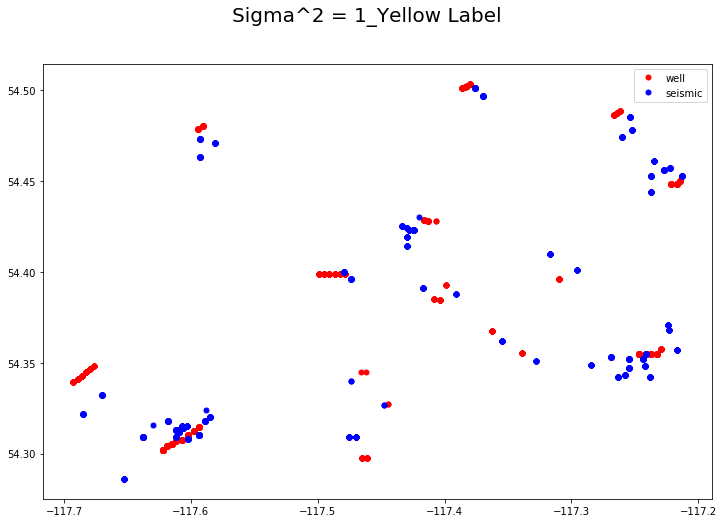

In [25]:
plot_locs_fig,plot_locs_ax=plt.subplots(figsize=(12,8))
result3_final_l1=result3_final[result3_final['label']==1]
plot_locs_ax.plot(result3_final_l1['well_lon'],result3_final_l1['well_lat'],'ro',markersize=5,label="well")
plot_locs_ax.plot(result3_final_l1['seismic_lon'],result3_final_l1['seismic_lat'],'bo',markersize=5,label="seismic",)
plot_locs_ax.legend()
plot_locs_fig.suptitle('Sigma^2 = 1_Yellow Label',fontsize=20)

Text(0.5, 0.98, 'Sigma^2 = 1_Blue Label')

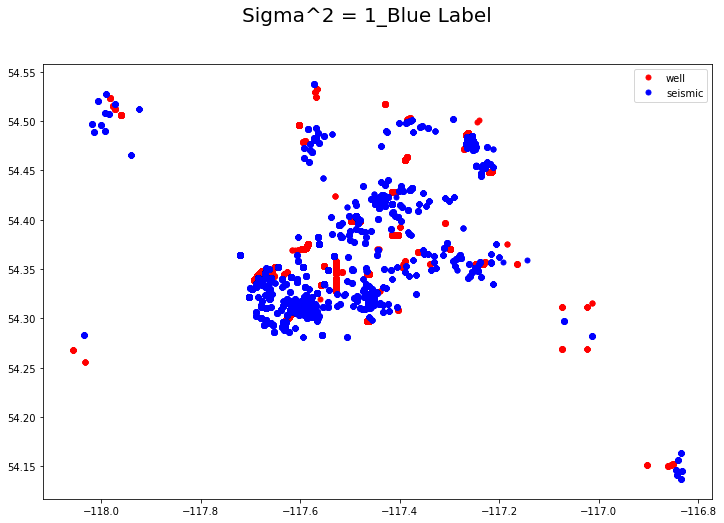

In [26]:
plot_locs_fig,plot_locs_ax=plt.subplots(figsize=(12,8))
result3_final_l1=result3_final[result3_final['label']==0]
plot_locs_ax.plot(result3_final_l1['well_lon'],result3_final_l1['well_lat'],'ro',markersize=5,label="well")
plot_locs_ax.plot(result3_final_l1['seismic_lon'],result3_final_l1['seismic_lat'],'bo',markersize=5,label="seismic",)
plot_locs_ax.legend()
plot_locs_fig.suptitle('Sigma^2 = 1_Blue Label',fontsize=20)

In [23]:
result3_final_l1

,Unnamed: 0,seismic_no,seismic_time,seismic_lat,seismic_lon,seismic_Dep,Mpf,well_name,well_uwi,well_date,...,f8,f9,f10,f11,f12,f13,f14,f15,f16,label
521,521,6179,2018-07-22 12:07:00,54.322,-117.685,3.91,2.80,ECA HZ SIMON 8-9-62-25,100080906225W500,2018-07-23 00:00:00,...,0.005222,0.901614,0.424276,0.013802,0.000139,0.011053,0.039922,0.030052,0.023137,1
522,522,6180,2018-07-22 21:36:00,54.332,-117.670,3.50,2.69,ECA HZ SIMON 8-9-62-25,100080906225W500,2018-07-23 00:00:00,...,0.003827,0.412778,0.602348,0.026079,0.000072,0.016569,0.049134,0.042532,0.036829,1
543,543,6179,2018-07-22 12:07:00,54.322,-117.685,3.91,2.80,ECA HZ SIMON 8-9-62-25,100080906225W500,2018-07-23 00:00:00,...,0.005222,0.901614,0.424276,0.013802,0.000139,0.011053,0.039922,0.030052,0.023137,1
544,544,6180,2018-07-22 21:36:00,54.332,-117.670,3.50,2.69,ECA HZ SIMON 8-9-62-25,100080906225W500,2018-07-23 00:00:00,...,0.003827,0.412778,0.602348,0.026079,0.000072,0.016569,0.049134,0.042532,0.036829,1
565,565,6179,2018-07-22 12:07:00,54.322,-117.685,3.91,2.80,ECA HZ SIMON 8-9-62-25,100080906225W500,2018-07-24 00:00:00,...,0.006759,0.883991,0.415983,0.019726,0.000136,0.012955,0.039142,0.029464,0.022685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28345,28345,5372,2015-01-14 00:48:00,54.362,-117.355,2.80,2.49,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-16 00:00:00,...,0.001258,0.126608,0.276995,0.045140,0.000007,0.006147,0.011537,0.010652,0.009741,1
28354,28354,5371,2015-01-13 20:58:00,54.351,-117.328,2.80,2.52,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-18 00:00:00,...,0.002240,0.072678,0.263115,0.091855,0.000007,0.012100,0.013898,0.013562,0.012990,1
28355,28355,5372,2015-01-14 00:48:00,54.362,-117.355,2.80,2.49,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-18 00:00:00,...,0.001948,0.112551,0.246240,0.085269,0.000006,0.007809,0.010256,0.009470,0.008660,1
28364,28364,5371,2015-01-13 20:58:00,54.351,-117.328,2.80,2.52,MURPHY 03-14E GRIZZLY 14-11-62-23,100141106223W500,2015-01-19 00:00:00,...,0.002698,0.066306,0.240045,0.122159,0.000006,0.013197,0.012680,0.012373,0.011851,1


In [24]:
result3_final_l1.to_csv('sigma2_1.csv')